In [1]:
import pandas as pd
import seaborn as sns
from scripts import project_functions

df=project_functions.load_and_process('../../data/raw/games.csv')
df

,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,opening_name,first_move_white,first_move_black
9787,False,35,resign,white,-l-_jedi_knight_-l-,1564,erik123678,1503,Scandinavian Defense: Mieses-Kotroc Variation,e4,d5
9035,False,122,resign,black,1111112222,1675,crusova_35,1895,Sicilian Defense: Bowdler Attack,e4,c5
6508,False,149,draw,draw,a55s72,1500,ak6664,1500,Rat Defense: Harmonist,e4,d6
703,False,60,resign,black,a7twen,1500,bloonfreakster,1478,Kadas Opening,h4,e5
6524,False,5,resign,white,a_arda_y,1500,mehmetali_t,1518,Ruy Lopez,e4,e5
...,...,...,...,...,...,...,...,...,...,...,...
10400,True,43,resign,white,zynko,1494,chebyshev,1843,Caro-Kann Defense,e4,c6
10396,True,87,mate,white,zynko,1501,dachnik,1221,Caro-Kann Defense,e4,c6
17214,True,26,resign,white,zztopillo,1466,fazouane,1453,King's Pawn Game: King's Head Opening #2,e4,e5
14971,True,63,resign,white,zzzbbb,1616,wojand,1554,Italian Game: Giuoco Pianissimo | Italian Fou...,e4,e5


# Overal Rating Stats
---

In [2]:
stats=df['white_rating'].describe();
stats

count    20058.000000
mean      1596.631868
std        291.253376
min        784.000000
25%       1398.000000
50%       1567.000000
75%       1793.000000
max       2700.000000
Name: white_rating, dtype: float64

In [3]:
stats=df['black_rating'].describe();
stats

count    20058.000000
mean      1588.831987
std        291.036126
min        789.000000
25%       1391.000000
50%       1562.000000
75%       1784.000000
max       2723.000000
Name: black_rating, dtype: float64

# Turn stats
---

In [4]:
stats=df['turns'].describe();
stats

count    20058.000000
mean        60.465999
std         33.570585
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64

# Cleaning
---
The data set is already cleaned and the only null values in the data set can be found in the *'first_move_black'* column when black resigns on white's first move.

# Maping
---

<AxesSubplot:>

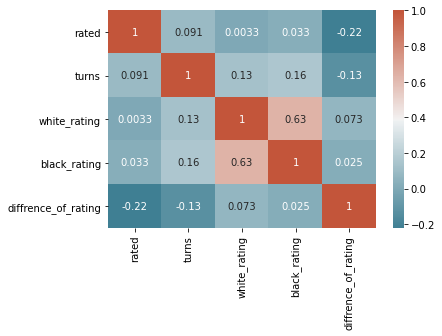

In [8]:
for ind, row in df.iterrows():
    df.loc[ind, "diffrence_of_rating"]=abs(row['white_rating']-row['black_rating'])
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [9]:
df

,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,opening_name,first_move_white,first_move_black,diffrence_of_rating
9787,False,35,resign,white,-l-_jedi_knight_-l-,1564,erik123678,1503,Scandinavian Defense: Mieses-Kotroc Variation,e4,d5,61.0
9035,False,122,resign,black,1111112222,1675,crusova_35,1895,Sicilian Defense: Bowdler Attack,e4,c5,220.0
6508,False,149,draw,draw,a55s72,1500,ak6664,1500,Rat Defense: Harmonist,e4,d6,0.0
703,False,60,resign,black,a7twen,1500,bloonfreakster,1478,Kadas Opening,h4,e5,22.0
6524,False,5,resign,white,a_arda_y,1500,mehmetali_t,1518,Ruy Lopez,e4,e5,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10400,True,43,resign,white,zynko,1494,chebyshev,1843,Caro-Kann Defense,e4,c6,349.0
10396,True,87,mate,white,zynko,1501,dachnik,1221,Caro-Kann Defense,e4,c6,280.0
17214,True,26,resign,white,zztopillo,1466,fazouane,1453,King's Pawn Game: King's Head Opening #2,e4,e5,13.0
14971,True,63,resign,white,zzzbbb,1616,wojand,1554,Italian Game: Giuoco Pianissimo | Italian Fou...,e4,e5,62.0


The positive correlation between black and whites rating means players are matched up with players of simular rating. There is a slight correlation between the diffrence_of_rating and the amount of turns in the game. This also makes sense because the the better one player is than the other, the more easily they can win. This diffrence may be more apparent if player were not matched against players of simular strength.